In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<img src="https:www.dofactory.com/img/sql/sql-join.png">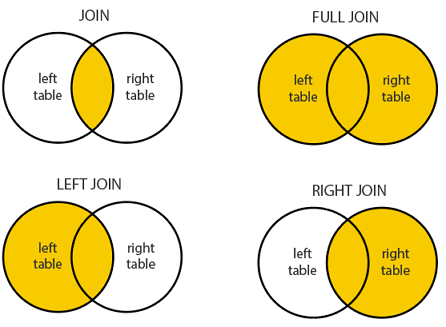

#join(inner join)
#full join
#left join
#right join

# joining function (methods) in pandas.

# load dataset from

In [5]:

student=pd.read_excel(r"C:\Users\Fine Gallery\Downloads\Joining.xlsx", sheet_name='students')
student.info()
display(student.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         7 non-null      int64 
 1   name       7 non-null      object
 2   course     7 non-null      object
 3   teacherid  7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


,id,name,course,teacherid
0,1,Asif,UGD,1
1,2,Hamza,PGD,3
2,3,Junaid,BS,2
3,4,Konain,MS,1
4,5,Rashid,PHD,3


In [7]:
teacher=pd.read_excel(r"C:\Users\Fine Gallery\Downloads\Joining.xlsx", sheet_name='teachers')
teacher.info()
display(teacher.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tid     4 non-null      int64 
 1   name    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


,tid,name
0,1,Dr. Najeed
1,2,Qasim
2,3,Dr. Khalid
3,4,Hamza


# Apply Defualt join (inner) -> Intersection


In [9]:
ldf = pd.merge(student, teacher, left_on="teacherid", right_on="tid")
display(ldf)


,id,name_x,course,teacherid,tid,name_y
0,1,Asif,UGD,1,1,Dr. Najeed
1,4,Konain,MS,1,1,Dr. Najeed
2,2,Hamza,PGD,3,3,Dr. Khalid
3,5,Rashid,PHD,3,3,Dr. Khalid
4,3,Junaid,BS,2,2,Qasim


In [10]:
ldf = pd.merge(student, teacher, 
               left_on="teacherid", right_on="tid",
              suffixes=('_std','_tech'))
display(ldf)


,id,name_std,course,teacherid,tid,name_tech
0,1,Asif,UGD,1,1,Dr. Najeed
1,4,Konain,MS,1,1,Dr. Najeed
2,2,Hamza,PGD,3,3,Dr. Khalid
3,5,Rashid,PHD,3,3,Dr. Khalid
4,3,Junaid,BS,2,2,Qasim


In [12]:
student[["id","course",'teacherid']]


,id,course,teacherid
0,1,UGD,1
1,2,PGD,3
2,3,BS,2
3,4,MS,1
4,5,PHD,3
5,6,MSDS,8
6,7,MSCS,9


In [13]:
ldf = pd.merge(student[["id","course",'teacherid']], teacher, 
               left_on="teacherid", right_on="tid",
              suffixes=('_std','_tech'))
display(ldf)


,id,course,teacherid,tid,name
0,1,UGD,1,1,Dr. Najeed
1,4,MS,1,1,Dr. Najeed
2,2,PGD,3,3,Dr. Khalid
3,5,PHD,3,3,Dr. Khalid
4,3,BS,2,2,Qasim


In [14]:
ldf = pd.merge(student[["id","course",'teacherid']], teacher, 
               left_on="teacherid", right_on="tid",
              suffixes=('_std','_tech')
              )[['id','course','name']]
display(ldf)


,id,course,name
0,1,UGD,Dr. Najeed
1,4,MS,Dr. Najeed
2,2,PGD,Dr. Khalid
3,5,PHD,Dr. Khalid
4,3,BS,Qasim


In [15]:
ldf = student.merge(teacher, 
                      left_on="teacherid", right_on="tid")
display(ldf)


,id,name_x,course,teacherid,tid,name_y
0,1,Asif,UGD,1,1,Dr. Najeed
1,4,Konain,MS,1,1,Dr. Najeed
2,2,Hamza,PGD,3,3,Dr. Khalid
3,5,Rashid,PHD,3,3,Dr. Khalid
4,3,Junaid,BS,2,2,Qasim


In [16]:
ldf = student.merge(teacher, 
                      left_on="teacherid", right_on="tid",
                    how='inner')
display(ldf)


,id,name_x,course,teacherid,tid,name_y
0,1,Asif,UGD,1,1,Dr. Najeed
1,4,Konain,MS,1,1,Dr. Najeed
2,2,Hamza,PGD,3,3,Dr. Khalid
3,5,Rashid,PHD,3,3,Dr. Khalid
4,3,Junaid,BS,2,2,Qasim


# Apply left join


In [17]:
ldf = student.merge(teacher, 
                      left_on="teacherid", right_on="tid",
                    how='left')
display(ldf)


,id,name_x,course,teacherid,tid,name_y
0,1,Asif,UGD,1,1.0,Dr. Najeed
1,2,Hamza,PGD,3,3.0,Dr. Khalid
2,3,Junaid,BS,2,2.0,Qasim
3,4,Konain,MS,1,1.0,Dr. Najeed
4,5,Rashid,PHD,3,3.0,Dr. Khalid
5,6,Qasim,MSDS,8,NaN,NaN
6,7,Hussnain,MSCS,9,NaN,NaN


# Apply Right Join


In [18]:
ldf = student.merge(teacher, 
                      left_on="teacherid", right_on="tid",
                    how='right')
display(ldf)


,id,name_x,course,teacherid,tid,name_y
0,1.0,Asif,UGD,1.0,1,Dr. Najeed
1,4.0,Konain,MS,1.0,1,Dr. Najeed
2,3.0,Junaid,BS,2.0,2,Qasim
3,2.0,Hamza,PGD,3.0,3,Dr. Khalid
4,5.0,Rashid,PHD,3.0,3,Dr. Khalid
5,NaN,NaN,NaN,NaN,4,Hamza


# Outer/Full Join


In [19]:
ldf = student.merge(teacher, 
                      left_on="teacherid", right_on="tid",
                    how='outer')
display(ldf)


,id,name_x,course,teacherid,tid,name_y
0,1.0,Asif,UGD,1.0,1.0,Dr. Najeed
1,4.0,Konain,MS,1.0,1.0,Dr. Najeed
2,2.0,Hamza,PGD,3.0,3.0,Dr. Khalid
3,5.0,Rashid,PHD,3.0,3.0,Dr. Khalid
4,3.0,Junaid,BS,2.0,2.0,Qasim
5,6.0,Qasim,MSDS,8.0,NaN,NaN
6,7.0,Hussnain,MSCS,9.0,NaN,NaN
7,NaN,NaN,NaN,NaN,4.0,Hamza


# Cross Join


In [20]:
ldf = student.merge(teacher, how='cross')
display(ldf)


,id,name_x,course,teacherid,tid,name_y
0,1,Asif,UGD,1,1,Dr. Najeed
1,1,Asif,UGD,1,2,Qasim
2,1,Asif,UGD,1,3,Dr. Khalid
3,1,Asif,UGD,1,4,Hamza
4,2,Hamza,PGD,3,1,Dr. Najeed
5,2,Hamza,PGD,3,2,Qasim
6,2,Hamza,PGD,3,3,Dr. Khalid
7,2,Hamza,PGD,3,4,Hamza
8,3,Junaid,BS,2,1,Dr. Najeed
9,3,Junaid,BS,2,2,Qasim


# Load Fee Data


In [21]:
tr = pd.read_excel(r"C:\Users\Fine Gallery\Downloads\Joining.xlsx",
                  sheet_name="Fee")
tr.info()
display(tr)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   stid    9 non-null      int64         
 1   date    9 non-null      datetime64[ns]
 2   amount  9 non-null      int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 344.0 bytes


,stid,date,amount
0,1,2022-01-01,11000
1,1,2022-02-01,7000
2,2,2022-01-05,9000
3,2,2022-02-03,1100
4,3,2022-01-02,500
5,1,2022-01-01,2000
6,5,2022-02-01,10000
7,1,2022-01-05,1000
8,2,2022-02-03,20


In [22]:
pd.DataFrame(tr.groupby(by=["stid"]))


,0,1
0,1,stid date amount 0 1 2022-01-01 ...
1,2,stid date amount 2 2 2022-01-05 ...
2,3,stid date amount 4 3 2022-01-02 ...
3,5,stid date amount 6 5 2022-02-01 ...


In [23]:
pd.DataFrame(tr.groupby(by=["stid"])[["amount"]])


,0,1
0,1,amount 0 11000 1 7000 5 2000 7 1000
1,2,amount 2 9000 3 1100 8 20
2,3,amount 4 500
3,5,amount 6 10000


In [24]:
tr.groupby(by=["stid"])[["amount"]].agg(['sum'])


,amount
,sum
stid,
1,21000
2,10120
3,500
5,10000


In [26]:
student.merge(tr.groupby(by=["stid"])[["amount"]].agg(['sum']),
              left_on="id", right_index=True)


C:\Users\Fine Gallery\AppData\Local\Temp\ipykernel_3940\1346115051.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  student.merge(tr.groupby(by=["stid"])[["amount"]].agg(['sum']),


,id,name,course,teacherid,"(amount, sum)"
0,1,Asif,UGD,1,21000
1,2,Hamza,PGD,3,10120
2,3,Junaid,BS,2,500
4,5,Rashid,PHD,3,10000


# Attendance


In [39]:
import re
x="""
Krazzy Knight2:18 PM
yes
Zareen Fatima2:18 PM
hes
Syed Ammad Waheed2:22 PM
4210113863591 Syed Ammad Waheed Hassani
taimoor qureshi2:22 PM
4240179641627
Ad Khan2:22 PM
Muhammad Adnan Khan 4220113823383
Tatheer Fatima2:23 PM
4210124609792
Mohsin Kanani2:23 PM
4230108335683
Muhammad Sameer2:25 PM
425011025700q
4250110257001
zain abidi2:26 PM
4250119167549
Muneeb Ahmed2:26 PM
4210183427183
Zeeshan Naqvi2:26 PM
4210151751811
Sumayya Kamran EB20_125 (EB20102125)2:26 PM
4250106544552
Krazzy Knight2:26 PM
4220124812817
Saba Naz2:26 PM
4250125987808
usman ahmad2:26 PM
4220116616709
Mushyada Ali2:26 PM
4210103553847
Muhammad Sameer2:27 PM
4250110257001
Faiza Asad2:27 PM
4200052746960
manal khan2:27 PM
4210170238438
Hassan Khan2:27 PM
4240160019477
Zareen Fatima2:29 PM
3520269403788
Mushyada Ali2:29 PM
10 to 12 is good
Nazneen Akram2:29 PM
Sir, 10 till 12 time is fine for me
Zahid Bashir2:29 PM
4250191411023
Muhammad Sameer2:31 PM
4210115022744
syed daniyal2:31 PM
4250189782769
zain abidi2:34 PM
42301-3966295-7
Shoaib Abdul Razzaque2:35 PM
5140176791651
Dewan S Khan2:45 PM
4220105630741
4220105630741
Shakir Hussain2:46 PM
4210182767349
Zeeshan Naqvi2:48 PM
42101-5175181-1
Arsalan Ahmed3:09 PM
4220165351957
Zeeshan Javed3:14 PM
4230189725317
HAREEM RIZVI3:14 PM
42101-3311570-4
Muhammad Rohan3:15 PM
4210116966995
Rozina Mazhar Ali3:18 PM
4220159083880
tsheikh sheikh3:18 PM
42101295111
4210129511133
Mohsin Kanani3:18 PM
4230108335683
tsheikh sheikh3:18 PM
4210129511133
Abdul Samad Siddiqui3:31 PM
4250164941763
Syed Usama Shahzad3:35 PM
4210134163079
khizra batool3:40 PM
5440047459326
Hassan Ahmed3:40 PM
4220156089133
Hassan Khan3:41 PM
4240160019477
Tariq Mehmood3:43 PM
4220104505899
Asima Ali3:45 PM
4420626938874
Syed Muhammad Abdullah3:45 PM
4220122868467
Zeeshan Naqvi3:51 PM
4210151751811
Faizan Ehtesham3:51 PM
4220143471143
Muneeb Ahmed3:51 PM
4210183427183
Faizan Ehtesham3:52 PM
4240114707349
Afnan Ali3:52 PM
4210146436547
Nazneen Akram3:52 PM
4210145447712
Syed Kashif Ahmed3:52 PM
4250144488545
Syed Tanveer4:00 PM
4220169252467
Qazi Moawiz4:01 PM
3130399221225
Syed Ali4:01 PM
Syed Masroor Ali 42401-1880106-5
Shakir Hussain4:01 PM
42101-8276734-9
Fazal Diyan4:01 PM
4230199459921
Muhammad Rohan4:01 PM
4210116966995
Haris Chhipa4:01 PM
4210156195059
Syed Usama Shahzad4:01 PM
4210134163079
Faiza Asad4:01 PM
4200052746960
Ali Naiyar4:01 PM
4210198030681
Muhammad Atique Qayyum4:01 PM
4220140225263
Yusra Adnan4:01 PM
4210164790696
Tatheer Fatima4:01 PM
4210124609792
Hussain Ali Jokhio4:01 PM
4220117852609
Mohsin Kanani4:01 PM
4230108335683
Fazal Diyan4:01 PM
4210175076663
Dewan S Khan4:01 PM
4220105630741
Muhammad Ayaz4:01 PM
4410242997959
Mushyada Ali4:01 PM
4210103553847
Ali Naiyar4:02 PM
4210120075463 Bilal Ahmed
syed daniyal4:02 PM
4250189782769
Wasiq Gt4:02 PM
4250104502069
Tabassum Ali4:02 PM
4230123126547
Sheikh Faizan4:02 PM
Sheikh M Faizan 42101-7490505-9
""".replace("-","")
cnic = pd.DataFrame(list(set(re.findall('\d{13}',x))), columns=["CNIC"])
print(len(cnic))
display(cnic)

58


,CNIC
0,4210182767349
1,4220165351957
2,4210175076663
3,4210145447712
4,4200052746960
5,4220124812817
6,4220113823383
7,5440047459326
8,4240118801065
9,4220156089133
